<a href="https://colab.research.google.com/github/naimishaawasthi14/naimisha/blob/main/rffeatureselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your malware dataset
malware_dataset_path = 'malwarebenign.csv'
malware_data = pd.read_csv('malwarebenign.csv', dtype={'column_92': str}, low_memory=False)

# Assuming 'df' is your DataFrame
malware_data.replace('?', 0, inplace=True)  # Replace '?' with 0

# Separate features (X) and target (y)
X = malware_data.drop('class', axis=1)  # Replace 'target_column_name' with the actual target column name
y = malware_data['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Drop rows with NaN values
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train.loc[X_train_no_nan.index]

# Fit the model
rf_classifier.fit(X_train_no_nan, y_train_no_nan)

# Extract feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Select the most important features
selected_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0]

# Print the selected features on separate lines
print("Selected Features:")
for feature in selected_features:
    print(feature)

# Print the selected features
print("Selected Features:", selected_features)

# Print the total number of features
total_features = len(selected_features)
print("Total Number of Features:", total_features)


transact: 0.0599719194786423
onServiceConnected: 0.0312188826453714
bindService: 0.030326164044073824
attachInterface: 0.03210614584842028
ServiceConnection: 0.02214257906527788
android.os.Binder: 0.03928325759736312
SEND_SMS: 0.061379215272301876
Ljava.lang.Class.getCanonicalName: 0.010114224730391625
Ljava.lang.Class.getMethods: 0.01921777432393563
Ljava.lang.Class.cast: 0.012229167663607798
Ljava.net.URLDecoder: 0.016058754076585097
android.content.pm.Signature: 0.011239086726572933
android.telephony.SmsManager: 0.03836667323000594
READ_PHONE_STATE: 0.053227867523791966
getBinder: 0.001940103690662407
ClassLoader: 0.019209057027974315
Landroid.content.Context.registerReceiver: 0.014487336445720143
Ljava.lang.Class.getField: 0.007417201521226474
Landroid.content.Context.unregisterReceiver: 0.009356404692156836
GET_ACCOUNTS: 0.011861528827446052
RECEIVE_SMS: 0.02577574281819596
Ljava.lang.Class.getDeclaredField: 0.007765001448227952
READ_SMS: 0.020083681387241353
getCallingUid: 0.0015

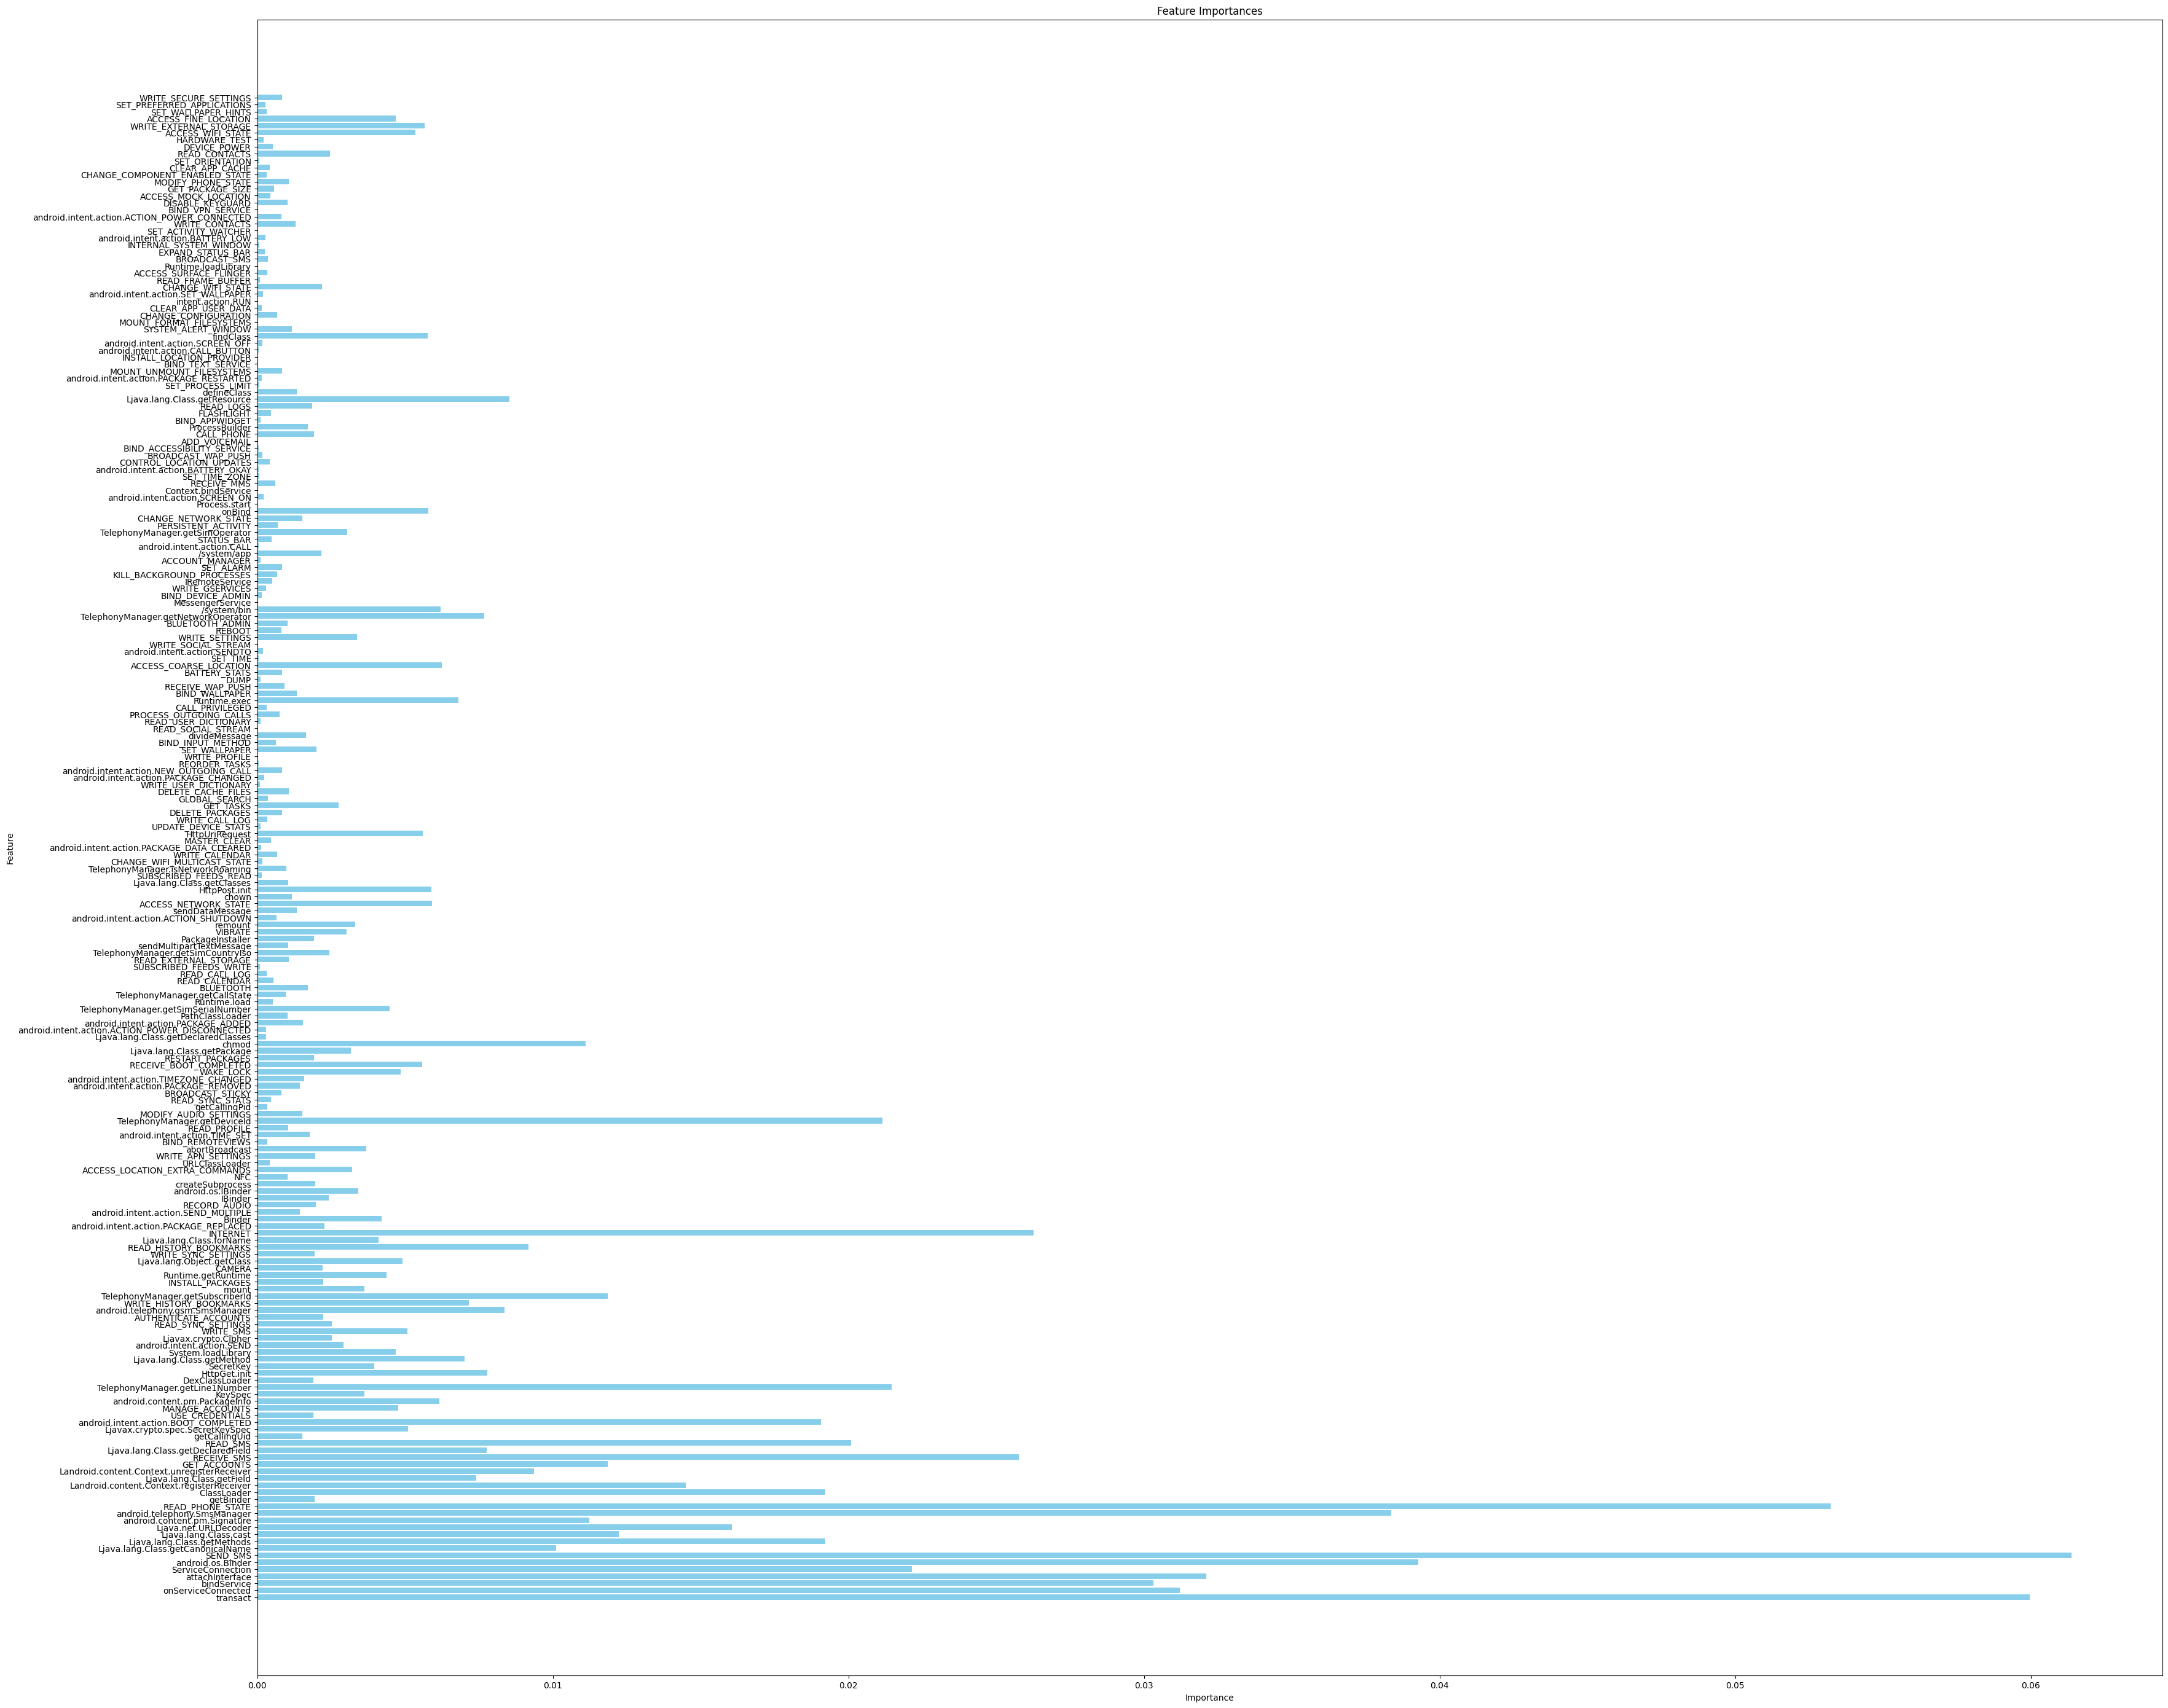

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar graph for feature importances
plt.figure(figsize=(40, 35))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Assuming you have already selected your features and stored them in a list called 'selected_features'

# Extract the selected features from the original dataset
X_selected = X[selected_features]

# Split the dataset into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train_selected, y_train)
    accuracy = clf.score(X_test_selected, y_test)
    print(f"{clf_name} Accuracy: {accuracy:.4f}")

SVM Accuracy: 0.9811


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9747
KNN Accuracy: 0.9771
Naive Bayes Accuracy: 0.7088
Decision Tree Accuracy: 0.9761
Random Forest Accuracy: 0.9880
